In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)

1.3.4


In [2]:
# Nếu muốn xử lý cả giá trị vô cực (inf) như dữ liệu khuyết
pd.options.mode.use_inf_as_na = True

# 0. Load dữ liệu và kiểm tra sơ bộ thông tin

In [3]:
# Load dữ liệu từ file và chọn các cột cần dùng

cols = ['origin', 'dep_delay', 'arr_delay', 'carrier', 'distance', 'air_time']
fdata = pd.read_csv('flight-data/nycflights.csv', usecols=cols)
#fdata.drop(['dep_time','air_time', 'tailnum', 'hour', 'minute'], inplace=True, axis=1)
fdata.head()

,dep_delay,arr_delay,carrier,origin,air_time,distance
0,2.0,11.0,UA,EWR,227.0,1400
1,4.0,20.0,UA,LGA,227.0,1416
2,2.0,33.0,AA,JFK,160.0,1089
3,-1.0,-18.0,B6,JFK,183.0,1576
4,-6.0,-25.0,DL,LGA,116.0,762


**Loại bỏ tất cả các dòng có xuất hiện bất cứ NaN nào**

In [4]:
# Loại bỏ tất cả các dòng có NaN
# Lưu ý: nếu chọn axis=1 sẽ bỏ các cột có NaN
fdata.dropna(inplace=True, axis=0, how="any")
fdata.reset_index(inplace=True, drop=True)
fdata

,dep_delay,arr_delay,carrier,origin,air_time,distance
0,2.0,11.0,UA,EWR,227.0,1400
1,4.0,20.0,UA,LGA,227.0,1416
2,2.0,33.0,AA,JFK,160.0,1089
3,-1.0,-18.0,B6,JFK,183.0,1576
4,-6.0,-25.0,DL,LGA,116.0,762
...,...,...,...,...,...,...
327341,-5.0,-17.0,B6,JFK,41.0,209
327342,-10.0,-20.0,B6,JFK,52.0,301
327343,-5.0,-16.0,B6,JFK,47.0,264
327344,12.0,1.0,B6,JFK,33.0,187


In [5]:
fdata.isna().any()

dep_delay    False
arr_delay    False
carrier      False
origin       False
air_time     False
distance     False
dtype: bool

In [6]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dep_delay  327346 non-null  float64
 1   arr_delay  327346 non-null  float64
 2   carrier    327346 non-null  object 
 3   origin     327346 non-null  object 
 4   air_time   327346 non-null  float64
 5   distance   327346 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 15.0+ MB


In [7]:
fdata.describe()

,dep_delay,arr_delay,air_time,distance
count,327346.000000,327346.000000,327346.000000,327346.000000
mean,12.555156,6.895377,150.686460,1048.371314
std,40.065688,44.633292,93.688305,735.908523
min,-43.000000,-86.000000,20.000000,80.000000
25%,-5.000000,-17.000000,82.000000,509.000000
50%,-2.000000,-5.000000,129.000000,888.000000
75%,11.000000,14.000000,192.000000,1389.000000
max,1301.000000,1272.000000,695.000000,4983.000000


In [8]:
# Lấy ra danh sách các hãng
carriers = fdata['carrier'].unique()
carriers

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [13]:
# Tính ra thời gian delay trung bình và khoảng cách bay trung bình của mỗi hãng
carrier_info = fdata[['carrier', 'dep_delay', 'distance']].groupby(['carrier']).mean()
carrier_info

,dep_delay,distance
carrier,,
9E,16.439574,529.889615
AA,8.569130,1343.279870
AS,5.830748,2402.000000
B6,12.967548,1069.689615
DL,9.223950,1237.979143
EV,19.838929,562.865031
F9,20.201175,1620.000000
FL,18.605984,664.787402
HA,4.900585,4983.000000


# 1. Biểu đồ với nhiều trục tung khác nhau

**1.1. Biểu đồ với 2 thông số khác nhau**

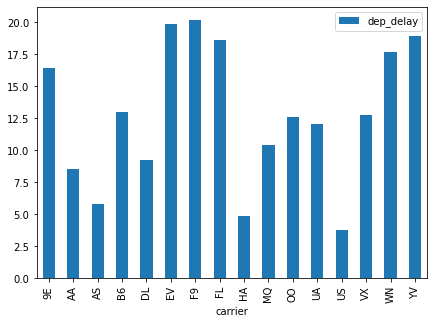

In [14]:
# Thử vẽ biểu đồ delay trung bình các hãng: dạng cột
ax1 = carrier_info.plot.bar(y='dep_delay', figsize=(7,5))
plt.show()
plt.close('all')

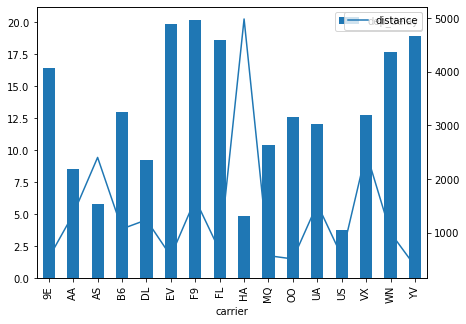

In [17]:
# Vẽ thêm biểu đồ về khoảng cách bay trung bình: dạng line
ax1 = carrier_info.plot.bar(y='dep_delay', figsize=(7,5))

ax2 = ax1.twinx()
carrier_info.plot.line(ax=ax2, y='distance')

plt.show()
plt.close('all')

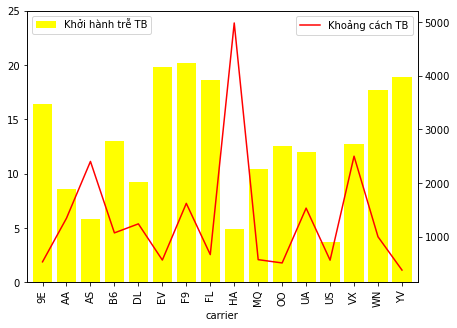

In [23]:
# Thay đổi màu sắc và vị trí legend cho dễ nhìn
ax1 = carrier_info.plot.bar(y='dep_delay', figsize=(7,5), width=0.8,
                            color='yellow', legend=True)
ax1.legend(loc='upper left', labels=['Khởi hành trễ TB'])
ax1.set_ylim([0, 25])

ax2 = ax1.twinx()
carrier_info.plot.line(ax=ax2, y='distance', color='red')
ax2.legend(labels=['Khoảng cách TB'])

plt.show()
plt.close('all')

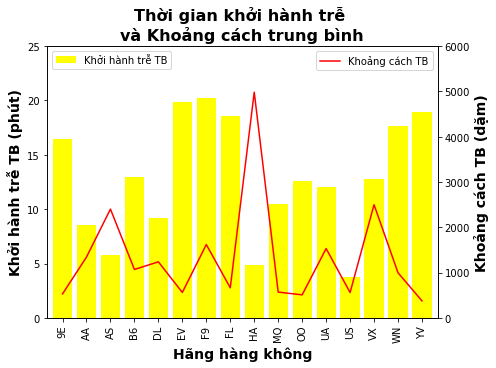

In [25]:
# Thêm các labels
ax1 = carrier_info.plot.bar(y='dep_delay', figsize=(7,5), width=0.8,
                            color='yellow', legend=True)
ax1.legend(loc='upper left', labels=['Khởi hành trễ TB'])
ax1.set_ylim([0, 25])
ax1.set_ylabel('Khởi hành trễ TB (phút)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Hãng hàng không', fontsize=14, fontweight='bold')
ax1.set_title('Thời gian khởi hành trễ \nvà Khoảng cách trung bình',
              fontsize=16, fontweight='bold')

ax2 = ax1.twinx()
carrier_info.plot.line(ax=ax2, y='distance', color='red')
ax2.legend(labels=['Khoảng cách TB'])
ax2.set_ylim([0, 6000])
ax2.set_ylabel('Khoảng cách TB (dặm)', fontsize=14, fontweight='bold')

plt.show()
plt.close('all')

**1.2. Biểu đồ với 3 thông số khác nhau**

In [26]:
# Tính thêm thời gian bay trung bình của mỗi hãng
carrier_info2 = fdata[['carrier', 'air_time']].groupby(['carrier']).mean()
carrier_info2

,air_time
carrier,
9E,86.781601
AA,188.822299
AS,325.617772
B6,151.177173
DL,173.688804
EV,90.076192
F9,229.599119
FL,101.143937
HA,623.087719


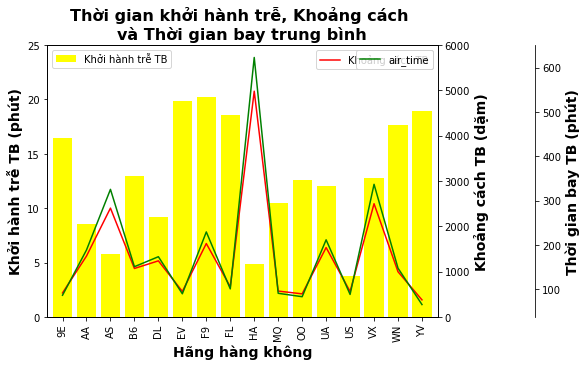

In [35]:
# Vẽ thêm thông số thứ 3 vào biểu đồ, set vị trí spines để hiển thị trục tung của nó
ax1 = carrier_info.plot.bar(y='dep_delay', figsize=(7,5), width=0.8,
                            color='yellow', legend=True)
ax1.legend(loc='upper left', labels=['Khởi hành trễ TB'])
ax1.set_ylim([0, 25])
ax1.set_ylabel('Khởi hành trễ TB (phút)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Hãng hàng không', fontsize=14, fontweight='bold')
ax1.set_title('Thời gian khởi hành trễ, Khoảng cách \nvà Thời gian bay trung bình',
              fontsize=16, fontweight='bold')

ax2 = ax1.twinx()
carrier_info.plot.line(ax=ax2, y='distance', color='red')
ax2.legend(labels=['Khoảng cách TB'])
ax2.set_ylim([0, 6000])
ax2.set_ylabel('Khoảng cách TB (dặm)', fontsize=14, fontweight='bold')

# Thực hiện vẽ thông số thứ 3 lên biểu đồ
ax3 = ax1.twinx()
carrier_info2.plot.line(ax=ax3, y='air_time', color='green')

# Vị trí của spines phía bên phải
ax3.spines['right'].set_position(('axes', 1.25))
ax3.set_ylabel('Thời gian bay TB (phút)', fontsize=14, fontweight='bold')
#ax3.set_ylim([-100, 800])

plt.show()
plt.close('all')

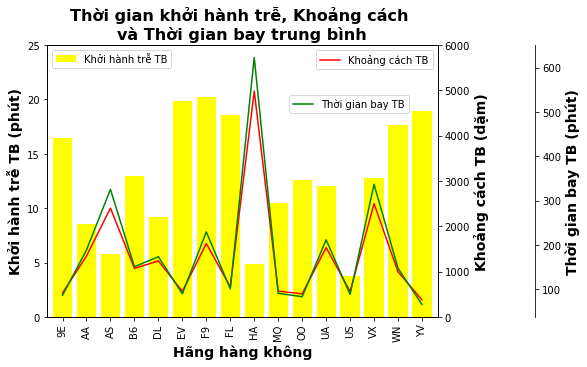

In [36]:
# Set lại vị trí của legend sau khi thêm thông số thứ 3
ax1 = carrier_info.plot.bar(y='dep_delay', figsize=(7,5), width=0.8,
                            color='yellow', legend=True)
ax1.legend(loc='upper left', labels=['Khởi hành trễ TB'])
ax1.set_ylim([0, 25])
ax1.set_ylabel('Khởi hành trễ TB (phút)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Hãng hàng không', fontsize=14, fontweight='bold')
ax1.set_title('Thời gian khởi hành trễ, Khoảng cách \nvà Thời gian bay trung bình',
              fontsize=16, fontweight='bold')

ax2 = ax1.twinx()
carrier_info.plot.line(ax=ax2, y='distance', color='red')
ax2.legend(labels=['Khoảng cách TB'])
ax2.set_ylim([0, 6000])
ax2.set_ylabel('Khoảng cách TB (dặm)', fontsize=14, fontweight='bold')

ax3 = ax1.twinx()
carrier_info2.plot.line(ax=ax3, y='air_time', color='green')
ax3.spines['right'].set_position(('axes', 1.25))
ax3.set_ylabel('Thời gian bay TB (phút)', fontsize=14, fontweight='bold')
ax3.legend(labels=['Thời gian bay TB'], loc=(0.62, 0.75), frameon=True)

plt.show()
plt.close('all')

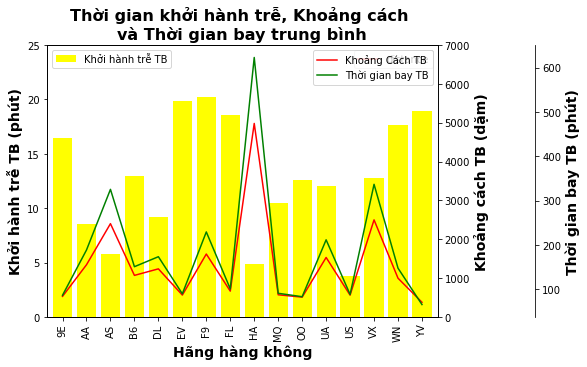

In [40]:
# Set lại vị trí của legend sau khi thêm thông số thứ 3
# cách phức tạp hơn

ax1 = carrier_info.plot.bar(y='dep_delay', figsize=(7,5), width=0.8,
                            color='yellow', legend=True)
ax1.legend(loc='upper left', labels=['Khởi hành trễ TB'])
ax1.set_ylim([0, 25])
ax1.set_ylabel('Khởi hành trễ TB (phút)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Hãng hàng không', fontsize=14, fontweight='bold')
ax1.set_title('Thời gian khởi hành trễ, Khoảng cách \nvà Thời gian bay trung bình',
              fontsize=16, fontweight='bold')

ax2 = ax1.twinx()
carrier_info.plot.line(ax=ax2, y='distance', color='red')
# ax2.legend(labels=['Khoảng cách TB'])
ax2.set_ylim([0, 7000])
ax2.set_ylabel('Khoảng cách TB (dặm)', fontsize=14, fontweight='bold')

ax3 = ax1.twinx()
carrier_info2.plot.line(ax=ax3, y='air_time', color='green')
ax3.spines['right'].set_position(('axes', 1.25))
ax3.set_ylabel('Thời gian bay TB (phút)', fontsize=14, fontweight='bold')
# ax3.legend(labels=['Thời gian bay TB'], loc=(0.62, 0.75), frameon=True)

# Lấy ra các handles của axes để đưa vào làm legend mới
l2_handle, l2_label = ax2.get_legend_handles_labels()
l3_handle, l3_label = ax3.get_legend_handles_labels()
handles = l2_handle + l3_handle
labels = ['Khoảng Cách TB', 'Thời gian bay TB']
plt.legend(handles=handles, labels=labels)

plt.show()
plt.close('all')

# 2. Biểu đồ bubble

In [5]:
# Thử lấy ra dữ liệu của một hãng (UA)
fUA = fdata[fdata['carrier'] == 'UA']
fUA

,dep_delay,arr_delay,carrier,origin,air_time,distance
0,2.0,11.0,UA,EWR,227.0,1400
1,4.0,20.0,UA,LGA,227.0,1416
5,-4.0,12.0,UA,EWR,150.0,719
12,-2.0,7.0,UA,JFK,345.0,2475
13,-2.0,-14.0,UA,EWR,361.0,2565
...,...,...,...,...,...,...
336723,-7.0,-43.0,UA,EWR,123.0,937
336728,-4.0,-13.0,UA,EWR,40.0,200
336737,-1.0,-25.0,UA,EWR,175.0,1400
336755,-7.0,-23.0,UA,EWR,37.0,200


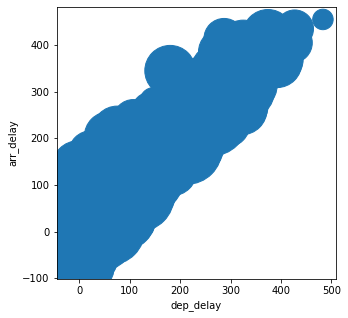

In [43]:
fUA.plot.scatter(x='dep_delay', y='arr_delay', s='distance', figsize=(5,5))
plt.show()
plt.close('all')

In [46]:
# Set lại scale của size (0-100) vì kích thước bubble quá lớn 
size = 100*fUA['distance']/fUA['distance'].max()
size

0         28.208745
1         28.531130
5         14.487205
12        49.869031
13        51.682450
            ...    
327299    18.879710
327304     4.029821
327313    28.208745
327331     4.029821
327338    51.682450
Name: distance, Length: 57782, dtype: float64

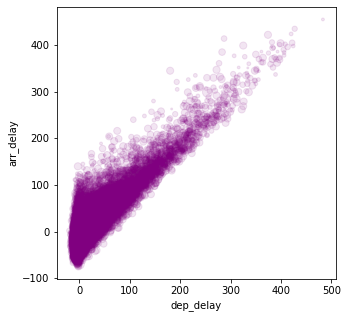

In [47]:
fUA.plot.scatter(x='dep_delay', y='arr_delay', figsize=(5,5),
                 color='purple', alpha=0.1, s=size)
plt.show()
plt.close('all')

# 3. Biểu đồ dạng boxplot

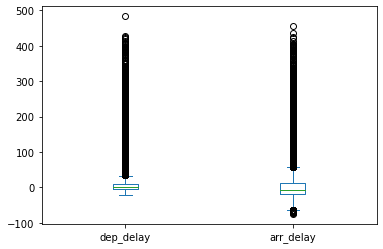

In [6]:
fUA[['dep_delay', 'arr_delay']].plot.box()
plt.show()
plt.close('all')

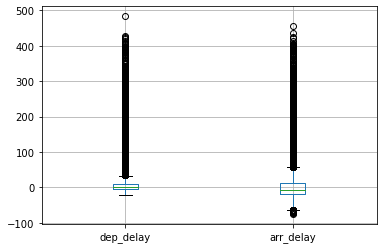

In [7]:
fUA.boxplot(column=['dep_delay', 'arr_delay'])
plt.show()
plt.close('all')

**Vẽ biểu đồ boxplot của cùng lúc nhiều hãng**

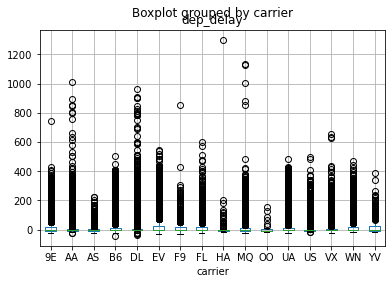

In [8]:
# Set tham số "by"
fdata.boxplot(column=['dep_delay'], by='carrier')
plt.show()
plt.close('all')

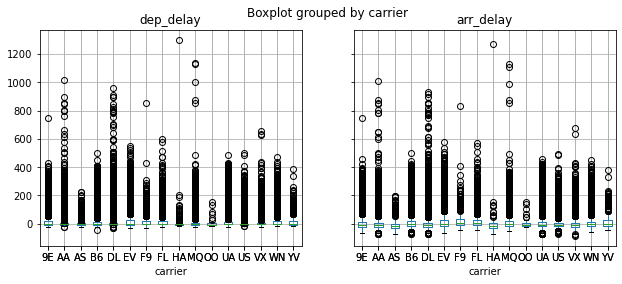

In [9]:
# Vẽ biểu đồ cho vài cột cũng bằng tham số "by"
fdata.boxplot(column=['dep_delay', 'arr_delay'], by='carrier', figsize=(10,4))
plt.show()
plt.close('all')

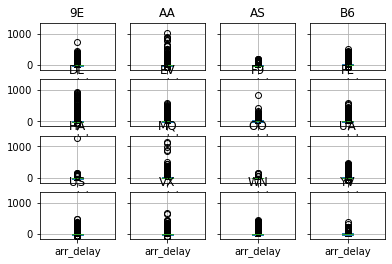

In [10]:
# Thử vẽ boxplot trên kết quả của groupby
# ==> Kết quả trong trường hợp này không ổn lắm
fdata[['arr_delay', 'carrier']].groupby('carrier').boxplot()
plt.show()
plt.close('all')

# 4. Biểu đồ donut và nested-donut

In [11]:
# Tính xem mỗi sân bay đã có bao nhiêu chuyến
airport_counts = fdata['origin'].value_counts()
airport_counts

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

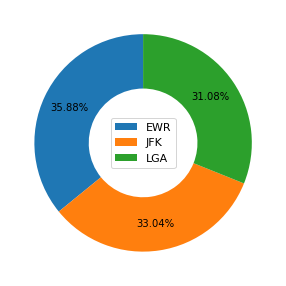

In [21]:
# Vẽ biểu đồ donut bằng cách set tham số "wedgeprops"
fig, ax = plt.subplots(figsize=(5,5), num=1)
ax.pie(airport_counts, 
        wedgeprops=dict(width=0.5), 
        startangle=90,
        autopct='%.2f%%', pctdistance=0.75)

# Set vị trí legend là chính giữa hình tròn
ax.legend(loc='center', labels = airport_counts.index, fontsize=11)
plt.show()

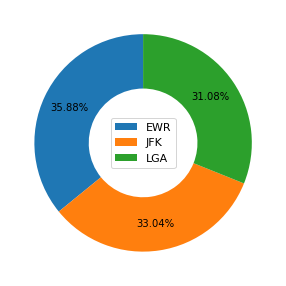

In [20]:
# Cách mới để thiết lập legend
labels = airport_counts.index
fig, ax = plt.subplots(figsize=(5,5), num=1)
wedges, text_labels, text_pcts = ax.pie(airport_counts, 
                                        wedgeprops=dict(width=0.5), 
                                        startangle=90, 
                                        autopct='%.2f%%', pctdistance=0.75)

# Set vị trí legend là chính giữa hình tròn
ax.legend(wedges, labels, loc="center",fontsize=11)
plt.show()

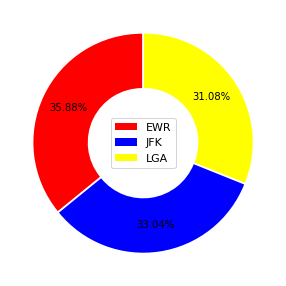

In [26]:
# Thay đổi màu sắc, thêm explode để làm nổi các mảnh lên
labels = airport_counts.index

explode = [0.01, 0.01, 0.01]
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']

fig, ax = plt.subplots(figsize=(5,5), num=1)
wedges, text_labels, text_pcts = ax.pie(airport_counts, wedgeprops=dict(width=0.5), 
                                        startangle=90, 
                                        autopct='%.2f%%', pctdistance=0.75, 
                                        explode=explode, colors=colors[0:4])
ax.legend(wedges, labels, loc="center",fontsize=11)
plt.show()

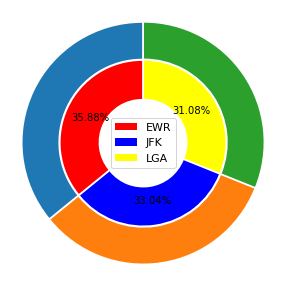

In [28]:
# Thử thêm một tầng donut thứ 2 (cũng vẫn thông số airport_counts)
labels = airport_counts.index
explode = [0.01, 0.01, 0.01]
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
fig, ax = plt.subplots(figsize=(5,5), num=1)
res1 = ax.pie(airport_counts, wedgeprops=dict(width=0.35), 
             startangle=90, radius=0.75,
             autopct='%.2f%%', pctdistance=0.70, 
             explode=explode,
             colors=colors[0:4])
wedges, text_labels, text_pcts = res1
ax.legend(wedges, labels, loc="center",fontsize=11)

# Thông số thứ 2 (Vẽ ra bên ngoài)
res2 = ax.pie(airport_counts, wedgeprops=dict(width=0.33), 
              startangle=90, radius=0.35+0.75, explode=explode,
             )
wedges, text_labels = res2

plt.show()
plt.close('all')

**Vẽ thêm thông số về delay và not-delay cho mỗi sân bay**

In [29]:
# Tính toán các trường hợp delay và not-delay của từng chuyến bay
airport_delay = fdata[['origin']].copy()
airport_delay['delay'] = fdata['dep_delay']>0
airport_delay

,origin,delay
0,EWR,True
1,LGA,True
2,JFK,True
3,JFK,False
4,LGA,False
...,...,...
336771,JFK,False
336772,LGA,False
336773,LGA,False
336774,LGA,False


In [31]:
# Thử đếm xem mỗi sân bay có bao nhiêu chuyến delay và not-delay
airport_delay2 = airport_delay.groupby(['origin'])['delay'].value_counts()
airport_delay2

origin  delay
EWR     False    68124
        True     52711
JFK     False    69248
        True     42031
LGA     False    70972
        True     33690
Name: delay, dtype: int64

In [32]:
type(airport_delay2)

pandas.core.series.Series

In [33]:
airport_delay2.index

MultiIndex([('EWR', False),
            ('EWR',  True),
            ('JFK', False),
            ('JFK',  True),
            ('LGA', False),
            ('LGA',  True)],
           names=['origin', 'delay'])

In [34]:
# Kiểm tra 6 thông tin của 3 sân bay
airport_delay2.values

array([68124, 52711, 69248, 42031, 70972, 33690], dtype=int64)

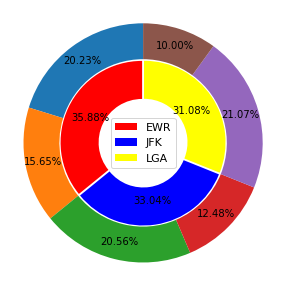

In [35]:
# Vẽ thêm thông số delay và not-delay vào donut thứ 2
labels = airport_counts.index
explode = [0.01, 0.01, 0.01]
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']

fig, ax = plt.subplots(figsize=(5,5), num=1)
res1 = ax.pie(airport_counts, wedgeprops=dict(width=0.35), 
              startangle=90, radius=0.75,
              autopct='%.2f%%', pctdistance=0.70, 
              explode=explode,
              colors=colors[0:4])
wedges, text_labels, text_pcts = res1
ax.legend(wedges, labels, loc="center",fontsize=11)

# Thông số thứ 2
res2 = ax.pie(airport_delay2.values, wedgeprops=dict(width=0.33), 
              startangle=90, radius=0.35+0.75,
              autopct='%.2f%%', pctdistance=0.85,
             )
wedges, text_labels, text_pcts = res2

plt.show()
plt.close('all')

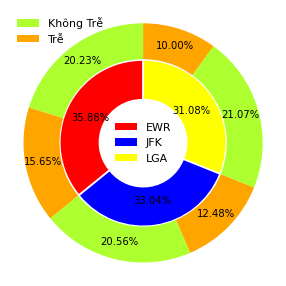

In [40]:
# Thay đổi màu sắc, thêm thông tin label
labels = airport_counts.index
explode = [0.01, 0.01, 0.01]
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']

fig, ax = plt.subplots(figsize=(5,5), num=1)
res1 = ax.pie(airport_counts, wedgeprops=dict(width=0.35), 
              startangle=90, radius=0.75,
              autopct='%.2f%%', pctdistance=0.70, 
              explode=explode,
              colors=colors[0:4]
             )
wedges, text_labels, text_pcts = res1

# Lưu ý: Nếu thêm 2 legend trên cùng 1 ax
# ax.legend(wedges, labels, loc="center",fontsize=11, frameon=False)
ax.add_artist(ax.legend(wedges, labels, loc="center",fontsize=11, frameon=False))

# color2 = ['green', 'gray']*3
color2 = ['#ADFF2F', '#FFA500']*3
res2 = ax.pie(airport_delay2.values, wedgeprops=dict(width=0.33), 
              startangle=90, radius=0.35+0.75, colors=color2,
              autopct='%.2f%%', pctdistance=0.85,
             )
wedges, text_labels, text_pcts = res2

# Lưu ý: Nếu thêm 2 legend trên cùng 1 ax
# wedges[:2], lấy 2 mảnh làm legend thôi
ax.legend(wedges[:2], ['Không Trễ', 'Trễ'], loc="best",fontsize=11, frameon=False)
#ax.add_artist(ax.legend(wedges[:2], ['Không Trễ', 'Trễ'], loc="best",fontsize=11, frameon=False))

plt.show()
plt.close('all')

**Sử dụng twinx()**

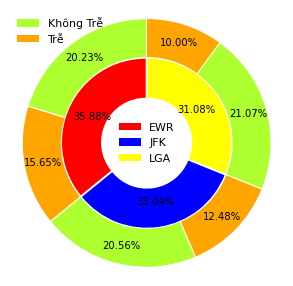

In [42]:
# Làm nổi các mảnh của donut thứ 2
labels = airport_counts.index
explode = [0.01, 0.01, 0.01]
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
fig, ax = plt.subplots(figsize=(5,5), num=1)
res1 = ax.pie(airport_counts, wedgeprops=dict(width=0.35), 
              startangle=90, radius=0.75,
              autopct='%.2f%%', pctdistance=0.70, 
              explode=explode,
              colors=colors[0:4]
             )
wedges, text_labels, text_pcts = res1
ax.legend(wedges, labels, loc="center",fontsize=11, frameon=False)

# Tạo twin thay vì vẽ trên cùng 1 ax 
ax2 = ax.twinx()
# color2 = ['green', 'gray']*3
color2 = ['#ADFF2F', '#FFA500']*3
explode2 = [0.01]*6
res2 = ax2.pie(airport_delay2.values, wedgeprops=dict(width=0.34), 
               startangle=90, radius=0.35+0.75, colors=color2,
               autopct='%.2f%%', pctdistance=0.85, explode=explode2
              )
wedges, text_labels, text_pcts = res2
ax2.legend(wedges[:2], ['Không Trễ', 'Trễ'], loc="upper left",fontsize=11, frameon=False)

plt.show()
plt.close('all')

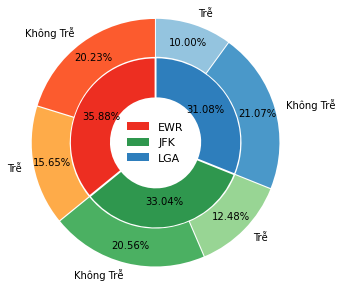

In [44]:
# Sử dụng màu sắc khác để sao cho thành phần con có màu giống thành phần cha
labels = airport_counts.index
explode = [0.01, 0.01, 0.01]
# colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
fig, ax = plt.subplots(figsize=(5,5), num=1)

# Định nghĩa 3 bộ màu a, b, c (theo các colormaps)
a, b, c=[plt.cm.YlOrRd, plt.cm.Greens, plt.cm.Blues]
# Tham khảo các mã màu: https://matplotlib.org/stable/tutorials/colors/colormaps.html

res1 = ax.pie(airport_counts, wedgeprops=dict(width=0.35), 
              startangle=90, radius=0.75,
              autopct='%.2f%%', pctdistance=0.70, 
              explode=explode,
              colors=[a(0.7), b(0.7), c(0.7)]
             )
wedges, text_labels, text_pcts = res1
ax.legend(wedges, labels, loc="center",fontsize=11, frameon=False)

ax2 = ax.twinx()
# color2 = ['green', 'gray']*3
# color2 = ['#ADFF2F', '#FFA500']*3
color2 = [a(0.6), a(0.4), b(0.6), b(0.4), c(0.6), c(0.4)]
explode2 = [0.01]*6
res2 = ax2.pie(airport_delay2.values, wedgeprops=dict(width=0.34), 
               startangle=90, radius=0.35+0.75, colors=color2,
               autopct='%.2f%%', pctdistance=0.85, explode=explode2,
               labels=['Không Trễ', 'Trễ']*3
              )
wedges, text_labels, text_pcts = res2
#ax2.legend(wedges[:2], ['Không Trễ', 'Trễ'], loc="upper left",fontsize=11, frameon=False)

plt.show()
plt.close('all')

# 5. Biểu đồ radar

**Giả sử ở 3 sân bay trên, chúng ta thực hiện survey với hành khách về mức độ hài lòng của họ với 5 dịch vụ**

In [57]:
categories = ['Thời Gian Check-in', 'Phòng Chờ', 'Chất Lượng Wifi', 'Nhà Vệ Sinh', 'Các Gian Hàng']
categories = [*categories, categories[0]]

sb1 = [4.3, 4.1, 5.2, 4.2, 3.1]
sb2 = [5.1, 5.4, 4.2, 5.5, 2.1]
sb3 = [3.1, 4.4, 5.2, 3.3, 5.1]

sb1 = [*sb1, sb1[0]]
sb2 = [*sb2, sb2[0]]
sb3 = [*sb3, sb3[0]]

labels = airport_counts.index
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(sb1))
#colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
colors = [plt.cm.YlOrRd(0.7), plt.cm.Greens(0.7), plt.cm.Blues(0.7)]

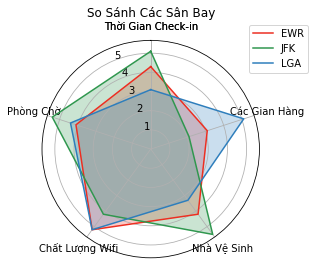

In [58]:
# from matplotlib.projections import register_projection
plt.figure(figsize=(4, 4))
# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(num=1, subplot_kw=dict(projection='polar'))

# Thiết lập góc bắt đầu
#ax.set_theta_zero_location('N')
ax.set_theta_offset(np.radians(90))

ax.plot(label_loc, sb1, label=labels[0], color=colors[0])
ax.fill(label_loc, sb1, facecolor=colors[0], alpha=0.25)

ax.plot(label_loc, sb2, label=labels[1], color=colors[1])
ax.fill(label_loc, sb2, facecolor=colors[1], alpha=0.25)

ax.plot(label_loc, sb3, label=labels[2], color=colors[2])
ax.fill(label_loc, sb3, facecolor=colors[2], alpha=0.25)

ax.set_title('So Sánh Các Sân Bay', size=12, y=1.08)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
ax.legend(loc=[0.95, 0.85])
plt.show()
plt.close('all')

# 6. Biểu đồ nhiệt

In [59]:
# Tính ra xem ở mỗi sân bay, mỗi hãng có bao nhiêu chuyến
airport_carrier = fdata[['origin', 'carrier']].copy()
gr = airport_carrier.groupby('carrier')['origin'].value_counts()
gr

carrier  origin
9E       JFK       14651
         LGA        2541
         EWR        1268
AA       LGA       15459
         JFK       13783
         EWR        3487
AS       EWR         714
B6       JFK       42076
         EWR        6557
         LGA        6002
DL       LGA       23067
         JFK       20701
         EWR        4342
EV       EWR       43939
         LGA        8826
         JFK        1408
F9       LGA         685
FL       LGA        3260
HA       JFK         342
MQ       LGA       16928
         JFK        7193
         EWR        2276
OO       LGA          26
         EWR           6
UA       EWR       46087
         LGA        8044
         JFK        4534
US       LGA       13136
         EWR        4405
         JFK        2995
VX       JFK        3596
         EWR        1566
WN       EWR        6188
         LGA        6087
YV       LGA         601
Name: origin, dtype: int64

In [60]:
# Dùng hàm crosstab để thực hiện phép tính như trên, nhưng biến các group con thành các cột
cba = pd.crosstab(airport_carrier['carrier'], airport_carrier['origin'])
cba

origin,EWR,JFK,LGA
carrier,,,
9E,1268,14651,2541
AA,3487,13783,15459
AS,714,0,0
B6,6557,42076,6002
DL,4342,20701,23067
EV,43939,1408,8826
F9,0,0,685
FL,0,0,3260
HA,0,342,0


In [61]:
# Kiểm tra mảng numpy chứa giá trị số chuyến bay của mỗi hãng ở mỗi sân bay
# Số lượng các chuyến bay chính là cường độ đậm - nhật trên biểu đồ nhiệt
cba.values

array([[ 1268, 14651,  2541],
       [ 3487, 13783, 15459],
       [  714,     0,     0],
       [ 6557, 42076,  6002],
       [ 4342, 20701, 23067],
       [43939,  1408,  8826],
       [    0,     0,   685],
       [    0,     0,  3260],
       [    0,   342,     0],
       [ 2276,  7193, 16928],
       [    6,     0,    26],
       [46087,  4534,  8044],
       [ 4405,  2995, 13136],
       [ 1566,  3596,     0],
       [ 6188,     0,  6087],
       [    0,     0,   601]], dtype=int64)

In [51]:
cba.index

Index(['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA',
       'US', 'VX', 'WN', 'YV'],
      dtype='object', name='carrier')

In [52]:
cba.shape

(16, 3)

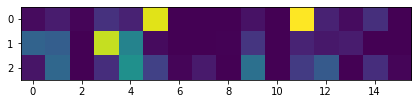

In [62]:
fig, ax = plt.subplots(figsize=[7,2])
im = ax.imshow(cba.values.T)
plt.show()
plt.close('all')

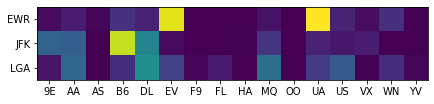

In [63]:
# Thêm vào các labels 
fig, ax = plt.subplots(figsize=[7,2])
im = ax.imshow(cba.values.T)

nx, ny = cba.shape
ax.set_xticks(np.arange(nx))
ax.set_xticklabels(cba.index)

ax.set_yticks(np.arange(ny))
ax.set_yticklabels(cba.columns)

plt.show()
plt.close('all')

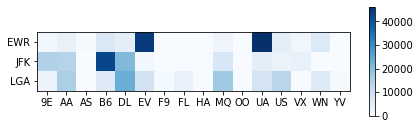

In [64]:
# Thử thay đổi colormap
fig, ax = plt.subplots(figsize=[7,2])
im = ax.imshow(cba.values.T, cmap ="Blues")

nx, ny = cba.shape
ax.set_xticks(np.arange(nx))
ax.set_xticklabels(cba.index)

ax.set_yticks(np.arange(ny))
ax.set_yticklabels(cba.columns)

plt.colorbar(im)
plt.show()
plt.close('all')

In [65]:
# Thay vì hiển thị bằng matplotlib, có thể hiển thị chính dataframe
cba.T.style.background_gradient(cmap ='Blues')\
        .set_properties(**{'font-size': '10px'})

carrier,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
origin,,,,,,,,,,,,,,,,
EWR,1268,3487,714,6557,4342,43939,0,0,0,2276,6,46087,4405,1566,6188,0
JFK,14651,13783,0,42076,20701,1408,0,0,342,7193,0,4534,2995,3596,0,0
LGA,2541,15459,0,6002,23067,8826,685,3260,0,16928,26,8044,13136,0,6087,601


In [66]:
# Bỏ đi thành phần tên của index và columns
cba.index.name=None
cba.columns.name=None
cba.style.background_gradient(cmap ='Blues')\
        .set_properties(**{'font-size': '10px'})

,EWR,JFK,LGA
9E,1268,14651,2541
AA,3487,13783,15459
AS,714,0,0
B6,6557,42076,6002
DL,4342,20701,23067
EV,43939,1408,8826
F9,0,0,685
FL,0,0,3260
HA,0,342,0
MQ,2276,7193,16928
